<!-- KODE = "ja", "nei", default "ja" -->

<!-- dom:TITLE: Numerical integration  -->
# Numerical integration: Part III 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**, revised by **Markus Grasmair, André Massing**

Date: **Feb 1, 2021** 

In this note, we will discuss **practical error estimate** for numerical
integration and **adaptive integration**.

In [20]:
from IPython.core.display import HTML
def css_styling():
    try:
        with open("tma4125.css", "r") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass #Do nothing

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

In [21]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

## Error estimate
To simplify notation a bit, we will now write $S_m(a,b)$
instead of
$
\mathrm{CSR}[f]({[x_{i-1}, x_{i}]}_{i=1}^{m}).
$

From a practical point of view, the error expression derived for the composite Simpson's rule has some
limitations, the main difficulty being that it depends on the unknown value
$f^{(4)}(\xi)$. In practice, we can at best use an error estimate of the form
$$
\lvert I(a,b) - S_m(a,b)\rvert \le \frac{(b-a) h^4}{2880} \lVert f^{(4)}\rVert_\infty.
$$
This bound, however, often vastly overestimates the actual error.
In addition, we do not always
know (or want to find) $\lVert f^{(4)}\rVert_\infty$. So the question arises:
How can we find an estimate of the error, without any extra analytical
calculations? 

This is the idea: 
Let the interval $(a,b)$ chosen small, such that $f^{(4)}(x)$ can be
assumed to be almost constant over the interval. Let $H=b-a$ be the length of the interval. Let $S_1(a,b)$ and $S_2(a,b)$ be the results from Simpson's formula over one and two subintervals respectively. Further, let $C = -f^{(4)}(x)/2880$ for some $x\in [a,b]$ --- which $x$ does not matter, as $f^{(4)}$ is assumed almost constant anyway. 

The errors of the two approximations are then given by
\begin{align*}
I(a,b) - S_1(a,b) &\approx C H^5,  \\ 
I(a,b) - S_2(a,b) &\approx 2 C \left(\frac{H}{2}\right)^5.
\end{align*}

Subtract the two expressions to eliminate $I(a,b)$:

$$
S_2(a,b) - S_1(a,b) \approx \frac{15}{16}C H^5
   \qquad \Rightarrow \qquad
   CH^5 \approx \frac{16}{15}(S_2(a,b) - S_1(a,b)).
$$

Insert this  in the expression for the error:

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

\begin{equation}
E_1(a,b) = I(a,b) - S_1(a,b) \approx \frac{16}{15} (\,S_2(a,b) - S_1(a,b)\, ) = \mathcal{E}_1(a,b), 
\label{_auto13} \tag{13}
\end{equation}

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

\begin{equation}  
E_2(a,b) =  I(a,b) - S_2(a,b) \approx \frac{1}{15} (\,S_2(a,b) - S_1(a,b)\, ) = \mathcal{E}_2(a,b).
\label{_auto14} \tag{14}
\end{equation}

This gives us a computable estimate for the error, both in $S_1$ and $S_2$. As
the error in $S_2(a,b)$ is about 1/16 of the error in $S_1(a,b)$, and we anyway
need to compute both, we will use $S_2(a,b)$ as our approximation. An even better
approximation to the integral is given for free by just adding the error
estimate:
$$
I(a,b) \approx S_2(a,b) + \mathcal{E}_2(a,b)
= \frac{16}{15} S_2(a,b) - \frac{1}{15} S_1(a,b).
$$

**Example 5:**
Find an approximation to the integral $\int_0^1\cos(x)dx = \sin(1)$ by Simpson's
rule over one and two subintervals. Find the error estimates $\mathcal{E}_m$,
$m=1,2$  and compare with the exact error. 

*Solution:*

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

\begin{equation}
S_1(0,1) = \frac{1}{6} \big[ \cos(0.0) + 4\cos(0.5) + \cos(1.0) \big] = 0.8417720923 
\label{_auto15} \tag{15}
\end{equation}

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

\begin{equation}  
S_2(0,1) = \frac{1}{12} \big[ \cos(0.0) + 4 \cos(0.25) +2 \cos(0.5) + 4 \cos(0.75) + \cos(1.0) \big] = 0.8414893826
\label{_auto16} \tag{16}
\end{equation}

The exact error and the error estimate become:

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

\begin{equation}
E_1(0,1) = \sin(1) - S_1(0,1) = -3.011 \cdot 10^{-4}, \quad
\mathcal{E}_1(0,1) = \frac{16}{15}(S_2-S_1) = -3.016\cdot 10^{-4},  
\label{_auto17} \tag{17}
\end{equation}

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

\begin{equation}  
E_2(0,1) = \sin(1)-S_2(0,1) = -1.840 \cdot 10^{-5}, \quad 
\mathcal{E}_2(0,1) = \frac{1}{16} (S_2-S_1) = -1.885 \cdot 10^{-5}.
\label{_auto18} \tag{18}
\end{equation}

In this case, it is a very good correspondence between the error estimate and
the exact error. An even better approximation is obtained by adding the error
estimate to $S_2$:

$$
Q = S_{2}(0,1) + \mathcal{E}_2(0,1) = 0.8414705353607151
$$

with an error $\sin(1)-Q = 4.4945 \cdot 10^{-7}$. This gives a lot of additional
accuracy without any extra work. 

### Implementation of Simpson's method with an error estimate

The function `simpson_basic` returns

$$
S_2(a,b) \approx \int_{a}^b f(x)dx
$$

including an error estimate.

In [23]:
def simpson_basic(f, a, b):
    # Simpson's method with error estimate
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    # Output:
    #   S_2(a,b) and the error estimate.
    
    # The nodes 
    c = 0.5*(a+b)
    d = 0.5*(a+c)
    e = 0.5*(c+b)
    
    # Calculate S1=S_1(a,b), S2=S_2(a,b) 
    H = b-a
    S1 = H*(f(a)+4*f(c)+f(b))/6
    S2 = 0.5*H*(f(a)+4*f(d)+2*f(c)+4*f(e)+f(b))/6

    error_estimate = (S2-S1)/15    # Error estimate for S2
    return S2, error_estimate

**Test:**
As a first check of the implementation, use the example above, and make sure
that the results are the same:

In [24]:
# Test of simpson_basic

def f(x):               # Integrand
    return cos(x)

a, b = 0, 1             # Integration interval
    
I_exact = sin(1)        # Exact solution for comparision

# Simpson's method over two intervals, with error estimate
S, error_estimate = simpson_basic(f, a, b)

# Print the result and the exact solution 
print('Numerical solution = {:.8f}, exact solution = {:.8f}'.format(S, I_exact))

# Compare the error and the error estimate 
print('Error in S2 = {:.3e},  error estimate for S2 = {:.3e}'.format(I_exact-S, error_estimate))

Numerical solution = 0.84148938, exact solution = 0.84147098
Error in S2 = -1.840e-05,  error estimate for S2 = -1.885e-05


Next, let us see how reliable the quadrature and the error estimates are for
another example, which you have to do yourself: 

**Numerical experiment 3:**
Given the integral (with solution)

$$
I(a,b) = \int_a^b \frac{1}{1+16x^2} dx  = \left. \frac{\arctan(4x)}{4}
\right|_a^b
$$

1. Use `simpson_basic` to find an approximation to the integral over the interval $[0,8]$. Print out $S_2(0,8)$, the error estimate $\mathcal{E}_2(0,8)$ and the real error $E_2(0,8)$. How reliable are the error estimates?

2. Repeat the experiment over the intervals $[0,1]$ and $[4, 8]$. Notice the difference between exact error of the two intervals.

3. Repeat the experiment over the interval $[0,0.1]$.

**Please do this numerical experiment at home!** 

This is what you should observe from the experiment:
1. Interval $[0,8]$: The error is large, and the error estimate is significantly smaller than the real error (the error is *under-estimated*).

2. Interval $[0,1]$: As for the interval $[0,8]$. 

3. Interval $[4,8]$: Small error, and a reasonable error estimate.

4. Interval $[0,0.1]$: Small error, reasonable error estimate.

Why is it so, and how can we deal with it? Obviously, we need small subintervals
near $x=0$, while large subintervals are acceptable in the last half of the
interval. 

**Explanation:**
The error in Simpson's method is given by

$$
E(a,b) = -\frac{(b-a)^5}{2880}f^{(4)}(\xi).
$$

So let us take a look at $f^{(4)}(x)$:

$$
f(x)=\frac{1}{1+16x^2} \qquad \Rightarrow \qquad
   f^{(4)}(x) = 6144 \frac{1280 x^4 - 160x^2 +1}{(1-16x^2)^5}
$$

Text(0.5, 0, 'x')

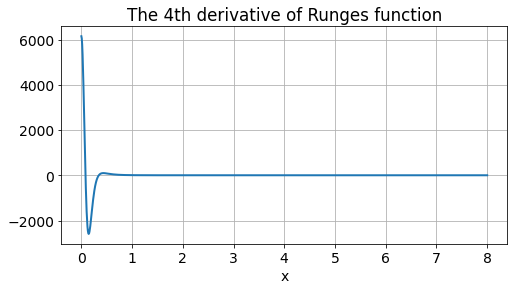

In [26]:
# Plot the 4th derivate of Runge's function:
def f(x):
    return 1/(1+16*x**2)

def df4(x):
    return 6144*(1280*x**4-160*x**2+1)/((1+16*x**2)**5)
x = linspace(0, 8, 1001)

plot(x, df4(x))
title('The 4th derivative of Runges function');
xlabel('x')

It is no surprise that the error is large and the error estimates fail (we have assumed $f^{(4)}$ almost constant for the estimates) over the interval $[0,1]$. The part of the interval where $f^{(4)}(x)$ is large has to be partitioned in significantly smaller subintervals to get an acceptable result. But how, as $f^{(4)}$ is in general not known? This is the topic of the next section. 

## Adaptive integration

Given a basic function, for example `simpson_basic`, returning an approximation $Q(a,b)$ to the integral, as well as an error estimate $\mathcal{E}(a,b)$. Based on this, we want to find a partitioning of the interval:

$$
a = X_0 < X_1 \cdots < X_m = b
$$

such that

$$
|\mathcal{E}(X_j, X_{j+1})| \approx \frac{X_{k+1}-X_k}{b-a} \cdot Tol
$$

where $Tol$ is a tolerance given by the user.

In this case

$$
\text{Accumulated error over $(a,b)$} \approx \sum_{j=0}^{m-1} \mathcal{E}(X_k, X_{k+1})
   \leq \text{Tol}.
$$

Such a partitioning can be done by an recursive algorithm:

**Algorithm: Adaptive quadrature.**

Given $f$, $a$, $b$ and a user defined tolerance Tol.
* Calculate $Q(a,b)$ and $\mathcal{E}(a,b)$.

* **if** $|\mathcal{E}(a,b)| \leq \text{Tol}$:

    * Accept the result, return $Q(a,b) + \mathcal{E}(a,b)$ as an approximation to $I(a,b)$.


* **else**:

    * Let $c=(a+b)/2$, and repeat the process on each of the subintervals $[a,c]$ and $[c,b]$, with tolerance  $\text{Tol}/2$.


* Sum up the accepted results from each subinterval.

### Implementation

The adaptive algorithm is implemented below with `simpson_basic` as the basic quadrature routine. 
The function `simpson_adaptive` is a recursive function, that is a function that calls itself.
To avoid it to do so infinitely many times, an extra variable `level` is introduced, this will increase by one for each time the function calls itself. If `level` is over some maximum value, the result is returned, and a warning printed.

In [27]:
def simpson_basic(f, a, b):
    # Simpson's method with error estimate
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    # Output:
    #   S_2(a,b) and the error estimate.
    
    # The nodes 
    c = 0.5*(a+b)
    d = 0.5*(a+c)
    e = 0.5*(c+b)
    
    # Calculate S1=S_1(a,b), S2=S_2(a,b) 
    H = b-a
    S1 = H*(f(a)+4*f(c)+f(b))/6
    S2 = 0.5*H*(f(a)+4*f(d)+2*f(c)+4*f(e)+f(b))/6

    error_estimate = (S2-S1)/15    # Error estimate for S2
    return S2, error_estimate

In [29]:
def simpson_adaptive(f, a, b, tol = 1.e-6, level = 0, maks_level=15):
    # Simpson's adaptive method
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    #   tol:  tolerance
    #   level, maks_level: For the recursion. Just ignore them. 
    # Output:
    #   The approximation to the integral
    
    
    Q, error_estimate = simpson_basic(f, a, b)    # The quadrature and the error estimate 
    
    # -------------------------------------------------
    # Write the output, and plot the nodes. 
    # This part is only for illustration. 
    if level == 0:
        print(' l   a           b         feil_est   tol')
        print('==============================================') 
    print('{:2d}   {:.6f}   {:.6f}   {:.2e}   {:.2e}'.format(
            level, a, b, abs(error_estimate), tol))
    
    x = linspace(a, b, 101)
    plot(x, f(x), [a, b], [f(a), f(b)], '.r')
    title('The integrand and the subintervals')
    # -------------------------------------------------
    
    if level >= maks_level:
        print('Warning: Maximum number of levels used.')
        return Q
    
    if abs(error_estimate) < tol:         # Accept the result, and return
        result = Q + error_estimate      
    else:
        # Divide the interval in two, and apply the algorithm to each interval.
        c = 0.5*(b+a)
        result_left  = simpson_adaptive(f, a, c, tol = 0.5*tol, level = level+1)
        result_right = simpson_adaptive(f, c, b, tol = 0.5*tol, level = level+1)
        result = result_right + result_left
    return result

**Numerical experiment 4:**
Use adaptive Simpson to find an approximation to the integral $ \int_0^5 1/(1+16x^2)dx $ using the tolerances Tol=$10^{-3}, 10^{-5}, 10^{-7}$. Compare the numerical result with the exact one.

 l   a           b         feil_est   tol
 0   0.000000   8.000000   4.25e-02   1.00e-03
 1   0.000000   4.000000   1.85e-02   5.00e-04
 2   0.000000   2.000000   5.11e-03   2.50e-04
 3   0.000000   1.000000   7.84e-04   1.25e-04
 4   0.000000   0.500000   6.41e-04   6.25e-05
 5   0.000000   0.250000   3.43e-05   3.13e-05
 6   0.000000   0.125000   1.21e-06   1.56e-05
 6   0.125000   0.250000   1.31e-06   1.56e-05
 5   0.250000   0.500000   7.82e-07   3.13e-05
 4   0.500000   1.000000   1.45e-05   6.25e-05
 3   1.000000   2.000000   1.40e-05   1.25e-04
 2   2.000000   4.000000   8.29e-06   2.50e-04
 1   4.000000   8.000000   4.33e-06   5.00e-04

Numerical solution = 0.384903, exact solution = 0.384889

Tolerance = 1.0e-03, error = 1.343e-05


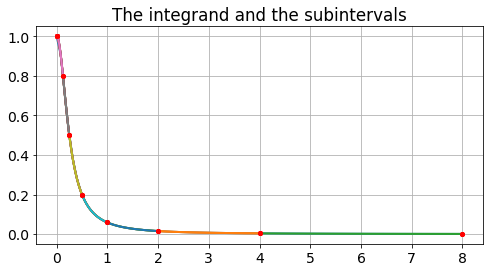

In [30]:
# Test: The adaptive Simpson's method
def f(x):                               # Integrand       
    return 1/(1+(4*x)**2)
a, b = 0, 8                             # Integration interval
I_exact = 0.25*(arctan(4*b)-arctan(4*a)) # Exact integral
tol = 1.e-3                             # Tolerance
# Apply the algorithm
result = simpson_adaptive(f, a, b, tol=tol)
# Print the result and the exact solution 
print('\nNumerical solution = {:8f}, exact solution = {:8f}'
      .format(result, I_exact))
# Compare the measured error and the tolerance
err = I_exact - result
print('\nTolerance = {:.1e}, error = {:.3e}'.format(tol, abs(err)))